Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <<https://github.com/xkaze09/CMSC197>>

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
# %matplotlib inline

In [362]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [363]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


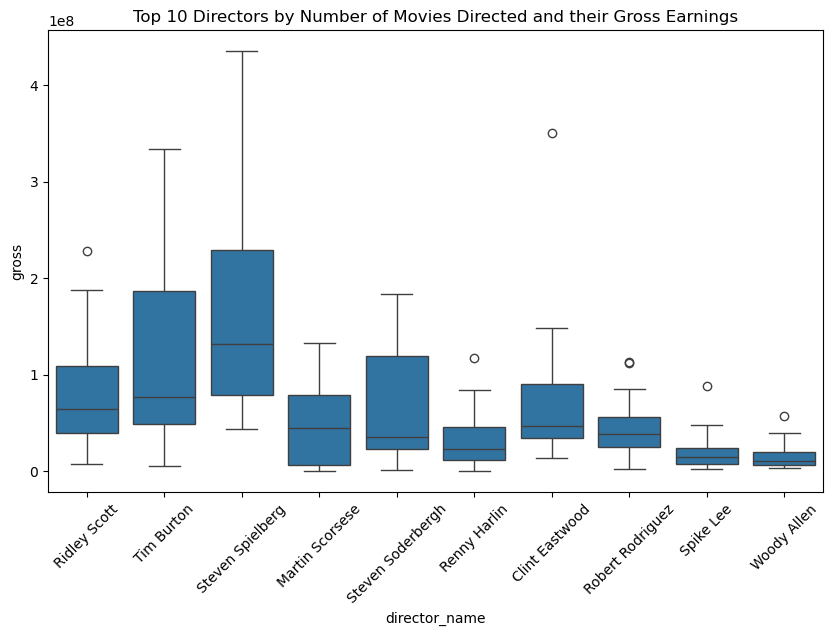

In [364]:
# Create a filtered copy of the data for outlier removal
filtered_data = data.copy()

# Filter out rows where 'gross' is NaN or zero in the filtered DataFrame
filtered_data = filtered_data[(filtered_data['gross'] != 0) & (~filtered_data['gross'].isna())]

# Get the top 10 directors with the most movies directed
top_directors = filtered_data['director_name'].value_counts().head(10).index
top_directors_data = filtered_data[filtered_data['director_name'].isin(top_directors)]

# Plotting the boxplot for gross earnings by top directors
plt.figure(figsize=(10, 6))
sns.boxplot(x='director_name', y='gross', data=top_directors_data)
plt.xticks(rotation=45)
plt.title('Top 10 Directors by Number of Movies Directed and their Gross Earnings')
plt.show()

## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

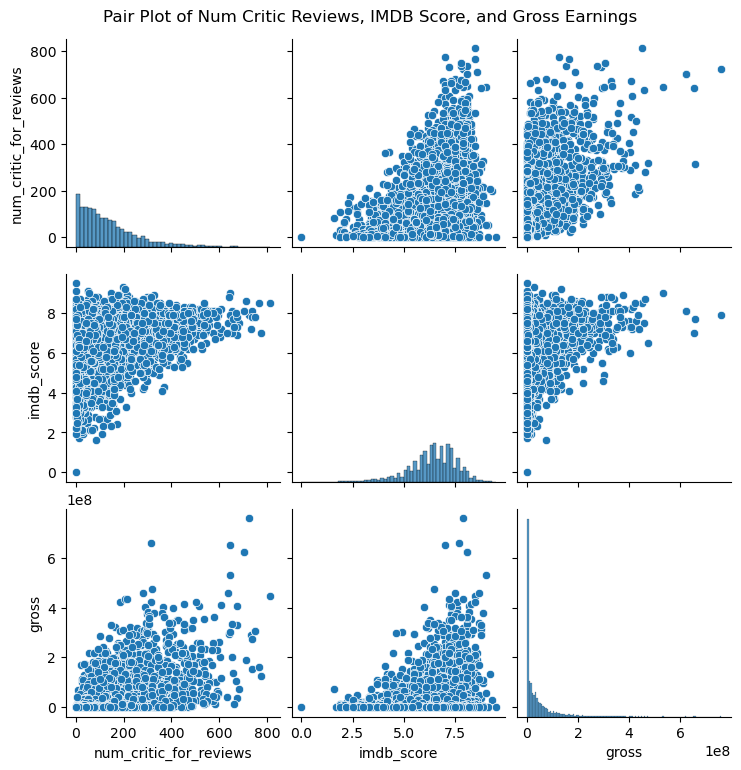

In [367]:
# Selecting the columns to plot
columns_to_plot = ['num_critic_for_reviews', 'imdb_score', 'gross']

# Create a pair plot
sns.pairplot(data[columns_to_plot])

# Add a title to the entire plot
plt.suptitle('Pair Plot of Num Critic Reviews, IMDB Score, and Gross Earnings', y=1.02)

# Show the plot
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [369]:
# Compute Sales as Gross - Budget
data['Sales'] = data['gross'] - data['budget']

# Display the first few rows to check the new column
data.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0


## Which directors garnered the most total Sales?

In [371]:
# Group the data by director_name and sum the Sales for each director
Sales_per_director = data.groupby('director_name')['Sales'].sum()

# Sort the summed Sales in descending order to find the directors with the highest total Sales
director_Sales_sorted = Sales_per_director.sort_values(ascending=False)

# Display the top directors by total Sales in a more readable format
director_Sales_df = director_Sales_sorted.reset_index()
director_Sales_df.columns = ['Director Name', 'Total Sales']

# Display the top 10 directors by total Sales
print(director_Sales_df.head(10).to_string(index=False))


    Director Name  Total Sales
 Steven Spielberg 2451332231.0
     George Lucas 1386641480.0
    James Cameron 1199625910.0
      Joss Whedon 1000886628.0
   Chris Columbus  941707624.0
    Peter Jackson  900969279.0
       Tim Burton  824275480.0
Christopher Nolan  808227576.0
      Jon Favreau  769381547.0
 Francis Lawrence  755501971.0


## Plot Sales and average likes as a scatterplot. Fit it with a line.

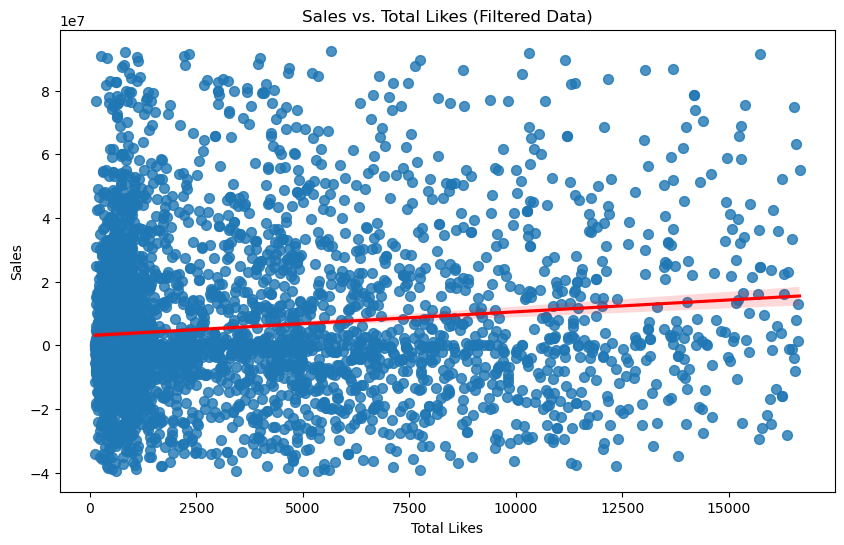

In [373]:
# Mean all relevant likes columns
data['total_likes'] = data[['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'movie_facebook_likes', 'cast_total_facebook_likes']].mean(axis=1)

# Define the lower and upper bounds for filtering outliers based on percentiles
lower_bound_likes = data['total_likes'].quantile(0.05)
upper_bound_likes = data['total_likes'].quantile(0.95)
lower_bound_Sales = data['Sales'].quantile(0.05)
upper_bound_Sales = data['Sales'].quantile(0.95)

# Filter the data to exclude outliers
filtered_data = data[(data['total_likes'] >= lower_bound_likes) & 
                     (data['total_likes'] <= upper_bound_likes) &
                     (data['Sales'] >= lower_bound_Sales) & 
                     (data['Sales'] <= upper_bound_Sales)]

# Create a scatterplot with a fitted regression line using the filtered data
plt.figure(figsize=(10, 6))
sns.regplot(x='total_likes', y='Sales', data=filtered_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Sales vs. Total Likes (Filtered Data)')
plt.xlabel('Total Likes')
plt.ylabel('Sales')

# Show the plot
plt.show()

## Which of these genres are the most profitable? Plot their Sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

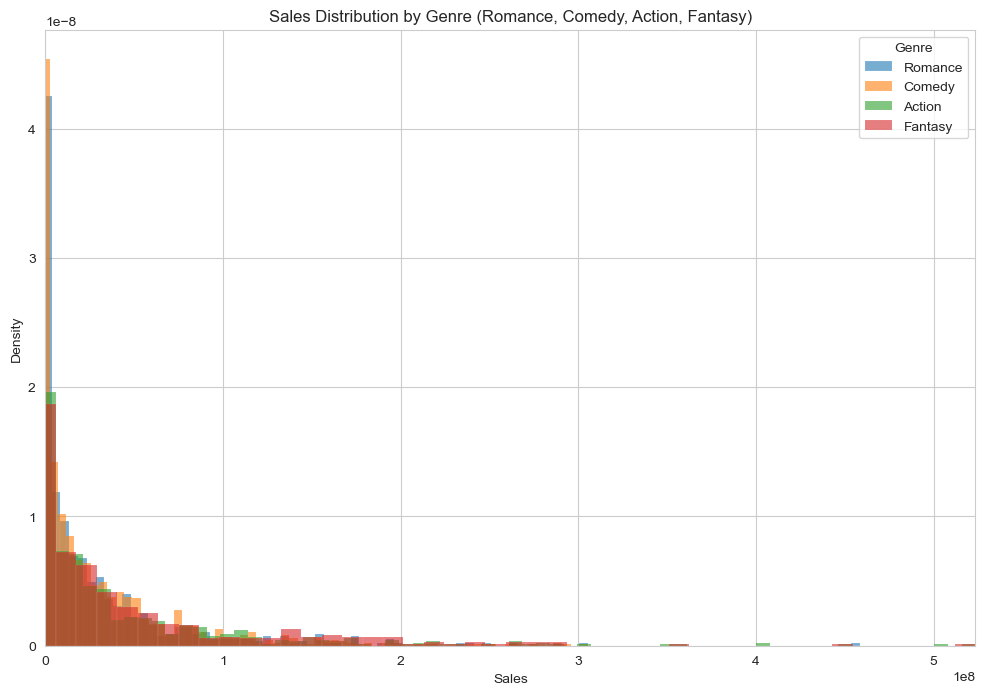

In [419]:
genres = ['Romance', 'Comedy', 'Action', 'Fantasy']

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop through the genres and plot their sales by density
for genre in genres:
    genre_data = data[data['genres'].str.contains(genre, case=False, na=False)]
    sns.histplot(genre_data['Sales'], label=genre, kde=False, stat='density', alpha=0.6)

# Customize the plot
plt.legend(title='Genre')
plt.title('Sales Distribution by Genre (Romance, Comedy, Action, Fantasy)')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.xlim(0, data['Sales'].max())
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, total_likes.

In [413]:
# Ensure the necessary actor like columns exist
actor_likes = ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']

# Compute the average likes across the three actors
data['total_likes'] = data[actor_likes].mean(axis=1)

# Display the first few rows to confirm the new column
data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'total_likes']].head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,total_likes
0,1000.0,936.0,855.0,930.333333
1,40000.0,5000.0,1000.0,15333.333333
2,11000.0,393.0,161.0,3851.333333
3,27000.0,23000.0,23000.0,24333.333333
4,131.0,12.0,0.0,47.666667


## Copying the whole dataframe

In [379]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,total_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [429]:
# Select numeric columns (integers and floats)
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create a copy of the dataframe to keep the original intact
df_normalized = df.copy()

# Apply Min-Max Normalization to each numeric column
for column in numeric_columns:
    min_value = df[column].min()
    max_value = df[column].max()
    df_normalized[column] = (df[column] - min_value) / (max_value - min_value)

In [431]:
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,total_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,USA,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,USA,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,UK,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,USA,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
